In [1]:
import csv
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json

In [2]:
#Vanessa's CSV
# out_df = pd.read_csv('Quick Facts - Out of State.csv')
# california_df = pd.read_csv('Quick Facts - California.csv')

#Emily's API


#Emily's CSV
csv_path = "SF_ALL_OUT.csv"
sf_out_df = pd.read_csv(csv_path)

#Rebecca's CSV

#Stefan's CSV


# Escape the Bay

Emily Todd, Vanessa Oakes, Rebecca Mih, Stefan Zobrist



Research Question to Answer: What are the motiviating factors to move out of SF county?

Parameters:
Used latest data 2017 unless otherwise noted
Although the majority of people leaving SF would move to nearby counties
we have separated within California and Out of State.


Research:

    We used census.gov and their datasets.
    We also we able to grab their API.

Housing:

Why are they leaving? 
Where are they going?
How's the housing market similar and different against SF County
Who are they?

_Insert Emily information

In [3]:
#Top 5 in-CA counties
ranked_sf_out_df = sf_out_df.sort_values(by='Total', ascending=False)
sf_to_ca = ranked_sf_out_df.loc[ranked_sf_out_df["State Name"] == "California",:]
sf_to_ca.head(5)


,State/County FIPS,State FIPS,County FIPS,County Name,State Name,Total,Margin of Error (+/-)
19,'06001','06','001',Alameda County,California,10791,1127
52,'06081','06','081',San Mateo County,California,8995,1054
25,'06013','06','013',Contra Costa County,California,4085,631
34,'06037','06','037',Los Angeles County,California,3726,547
54,'06085','06','085',Santa Clara County,California,3383,447


In [4]:
#Top 5 non-CA counties
sf_not_ca = ranked_sf_out_df.loc[ranked_sf_out_df["State Name"] != "California",:]
sf_not_ca.head(5)

,State/County FIPS,State FIPS,County FIPS,County Name,State Name,Total,Margin of Error (+/-)
259,'36061','36','061',New York County,New York,1419,657
413,'53033','53','033',King County,Washington,1293,336
326,'41051','41','051',Multnomah County,Oregon,1094,282
255,'36047','36','047',Kings County,New York,887,300
131,'17031','17','031',Cook County,Illinois,635,223


#Emily's CSV to show how she got in/out state
Top 5 Counties in California
California
1. Alameda County
2. San Mateo County
3. Contra Costa County
4. Los Angeles County
5. Santa Clara County

Top 5 Counties they leave outside of California
Non – California
1.	New York County (NY)
2.	King County (Washington)
3.	Multnomah County (Oregon)
4.	Kings County (New York)
5.	Cook County (Illinois)


#Vanessa's info
Generic:
Who are the people leaving? 
Race / Ethnicity
Gender / Age
Marital Status

#Emily info
Motivations
Why are they leaving? 
Where are they going?
How's the housing market similar and different against SF County

In [5]:
#Emily's housing analysis using census API

#dictionary for in-CA counties

base_url = "https://api.census.gov/data/2017/acs/acs1/profile"

ca_cty_name = ["San Francisco","Alameda","San Mateo","Contra Costa","Los Angeles","Santa Clara"]
ca_st_fips = ["06","06","06","06","06","06"]
ca_cty_fips = ["075","001","081","013","037","085"]

in_ca_dict = {
    "County Name": ca_cty_name,
    "State_FIPS": ca_st_fips,
    "County_FIPS": ca_cty_fips
}

in_ca_df = pd.DataFrame(in_ca_dict)
print(in_ca_df)

#dictionary for non-CA counties

nonca_cty_name = ["San Francisco","New York County","King County","Multnomah County","Kings County","Cook County"]
nonca_st_fips = ["06","36","53","41","36","17"]
nonca_cty_fips = ["075","061","033","051","047","031"]

non_ca_dict = {
    "County Name": nonca_cty_name,
    "State_FIPS": nonca_st_fips,
    "County_FIPS": nonca_cty_fips
}

non_ca_df = pd.DataFrame(non_ca_dict)
print(non_ca_df)

     County Name State_FIPS County_FIPS
0  San Francisco         06         075
1        Alameda         06         001
2      San Mateo         06         081
3   Contra Costa         06         013
4    Los Angeles         06         037
5    Santa Clara         06         085
        County Name State_FIPS County_FIPS
0     San Francisco         06         075
1   New York County         36         061
2       King County         53         033
3  Multnomah County         41         051
4      Kings County         36         047
5       Cook County         17         031


In [6]:
#collect median home values by county and add to data frames

ca_med_home_val = []
med_home_var = "DP04_0089E"
    
for county_id, state_id in zip(ca_cty_fips, ca_st_fips):
    med_home_val = requests.get(f"{base_url}?get={med_home_var}&for=county:{county_id}&in=state:{state_id}").json()
    ca_med_home_val.append(int(med_home_val[1][0]))
    
in_ca_df["Med_Home_Value"] = ca_med_home_val
print(in_ca_df)

non_ca_med_home_val = []
med_home_var = "DP04_0089E"

for county_id, state_id in zip(nonca_cty_fips, nonca_st_fips):
    med_home_val = requests.get(f"{base_url}?get={med_home_var}&for=county:{county_id}&in=state:{state_id}").json()
    non_ca_med_home_val.append(int(med_home_val[1][0]))
    
non_ca_df["Med_Home_Value"] = non_ca_med_home_val
print(non_ca_df)

     County Name State_FIPS County_FIPS  Med_Home_Value
0  San Francisco         06         075         1104100
1        Alameda         06         001          781000
2      San Mateo         06         081         1087100
3   Contra Costa         06         013          642300
4    Los Angeles         06         037          588700
5    Santa Clara         06         085          971300
        County Name State_FIPS County_FIPS  Med_Home_Value
0     San Francisco         06         075         1104100
1   New York County         36         061          976100
2       King County         53         033          563600
3  Multnomah County         41         051          393900
4      Kings County         36         047          701800
5       Cook County         17         031          247600


(0, 1200000)

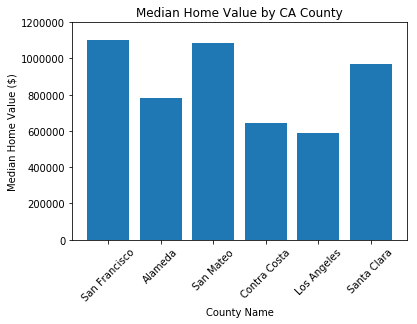

In [7]:
#plot in-CA median home values

x_axis = np.arange(len(ca_cty_name))
tick_locations = [x for x in x_axis]
plt.bar(x_axis, ca_med_home_val)
plt.xticks(tick_locations, ca_cty_name, rotation=45)

plt.title("Median Home Value by CA County")
plt.xlabel("County Name")
plt.ylabel("Median Home Value ($)")
plt.ylim(0, 1200000)

(0, 1200000)

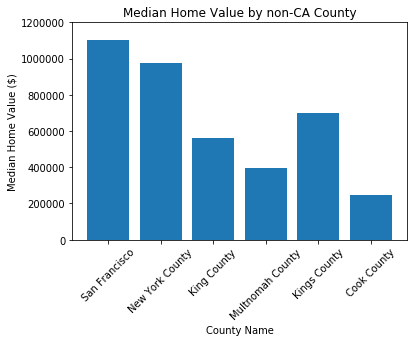

In [8]:
#plot non-CA median home values

x_axis = np.arange(len(nonca_cty_name))
tick_locations = [x for x in x_axis]
plt.bar(x_axis, non_ca_med_home_val)
plt.xticks(tick_locations, nonca_cty_name, rotation=45)

plt.title("Median Home Value by non-CA County")
plt.xlabel("County Name")
plt.ylabel("Median Home Value ($)")
plt.ylim(0, 1200000)

In [9]:
#follow the same process for median gross rents

ca_med_rent = []
med_rent_var = "DP04_0134E"
    
for county_id, state_id in zip(ca_cty_fips, ca_st_fips):
    med_rent = requests.get(f"{base_url}?get={med_rent_var}&for=county:{county_id}&in=state:{state_id}").json()
    ca_med_rent.append(int(med_rent[1][0]))
    
in_ca_df["Med_Rent"] = ca_med_rent
print(in_ca_df)

non_ca_med_rent = []
med_rent_var = "DP04_0134E"

for county_id, state_id in zip(nonca_cty_fips, nonca_st_fips):
    med_rent= requests.get(f"{base_url}?get={med_rent_var}&for=county:{county_id}&in=state:{state_id}").json()
    non_ca_med_rent.append(int(med_rent[1][0]))
    
non_ca_df["Med_Rent"] = non_ca_med_rent
print(non_ca_df)

     County Name State_FIPS County_FIPS  Med_Home_Value  Med_Rent
0  San Francisco         06         075         1104100      1836
1        Alameda         06         001          781000      1745
2      San Mateo         06         081         1087100      2259
3   Contra Costa         06         013          642300      1766
4    Los Angeles         06         037          588700      1402
5    Santa Clara         06         085          971300      2229
        County Name State_FIPS County_FIPS  Med_Home_Value  Med_Rent
0     San Francisco         06         075         1104100      1836
1   New York County         36         061          976100      1601
2       King County         53         033          563600      1555
3  Multnomah County         41         051          393900      1199
4      Kings County         36         047          701800      1367
5       Cook County         17         031          247600      1082


(0, 2500)

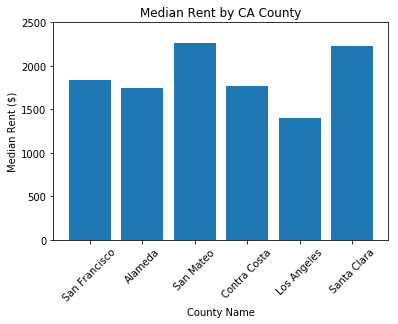

In [10]:
#plot in-CA median rents

x_axis = np.arange(len(ca_cty_name))
tick_locations = [x for x in x_axis]
plt.bar(x_axis, ca_med_rent)
plt.xticks(tick_locations, ca_cty_name, rotation=45)

plt.title("Median Rent by CA County")
plt.xlabel("County Name")
plt.ylabel("Median Rent ($)")
plt.ylim(0, 2500)

(0, 2500)

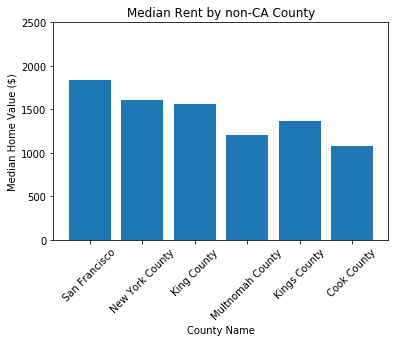

In [11]:
#plot non-CA median rents

x_axis = np.arange(len(nonca_cty_name))
tick_locations = [x for x in x_axis]
plt.bar(x_axis, non_ca_med_rent)
plt.xticks(tick_locations, nonca_cty_name, rotation=45)

plt.title("Median Rent by non-CA County")
plt.xlabel("County Name")
plt.ylabel("Median Home Value ($)")
plt.ylim(0, 2500)

In [12]:
#follow the same process for home owner rate

ca_own_rate = []
home_own_var = "DP04_0046PE"
    
for county_id, state_id in zip(ca_cty_fips, ca_st_fips):
    own_rate = requests.get(f"{base_url}?get={home_own_var}&for=county:{county_id}&in=state:{state_id}").json()
    ca_own_rate.append(float(own_rate[1][0]))
    
in_ca_df["Home Own Rate"] = ca_own_rate
print(in_ca_df)

nonca_own_rate = []
home_own_var = "DP04_0046PE"
    
for county_id, state_id in zip(nonca_cty_fips, nonca_st_fips):
    own_rate = requests.get(f"{base_url}?get={home_own_var}&for=county:{county_id}&in=state:{state_id}").json()
    nonca_own_rate.append(float(own_rate[1][0]))
    
non_ca_df["Home Own Rate"] = nonca_own_rate
print(non_ca_df)

     County Name State_FIPS County_FIPS  Med_Home_Value  Med_Rent  \
0  San Francisco         06         075         1104100      1836   
1        Alameda         06         001          781000      1745   
2      San Mateo         06         081         1087100      2259   
3   Contra Costa         06         013          642300      1766   
4    Los Angeles         06         037          588700      1402   
5    Santa Clara         06         085          971300      2229   

   Home Own Rate  
0           36.5  
1           53.3  
2           59.1  
3           67.8  
4           45.6  
5           56.8  
        County Name State_FIPS County_FIPS  Med_Home_Value  Med_Rent  \
0     San Francisco         06         075         1104100      1836   
1   New York County         36         061          976100      1601   
2       King County         53         033          563600      1555   
3  Multnomah County         41         051          393900      1199   
4      Kings County    

(0, 75)

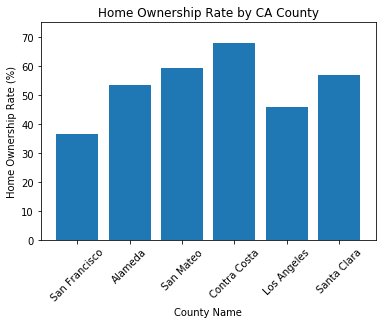

In [13]:
#plot in-CA home own rates

x_axis = np.arange(len(ca_cty_name))
tick_locations = [x for x in x_axis]
plt.bar(x_axis, ca_own_rate)
plt.xticks(tick_locations, ca_cty_name, rotation=45)

plt.title("Home Ownership Rate by CA County")
plt.xlabel("County Name")
plt.ylabel("Home Ownership Rate (%)")
plt.ylim(0, 75)

(0, 75)

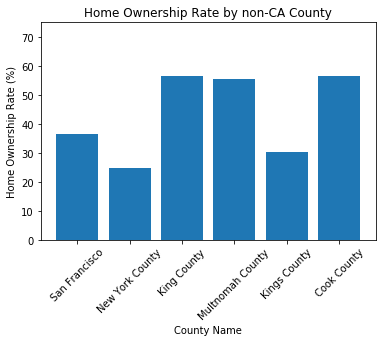

In [14]:
#plot non-CA home own rates

x_axis = np.arange(len(nonca_cty_name))
tick_locations = [x for x in x_axis]
plt.bar(x_axis, nonca_own_rate)
plt.xticks(tick_locations, nonca_cty_name, rotation=45)

plt.title("Home Ownership Rate by non-CA County")
plt.xlabel("County Name")
plt.ylabel("Home Ownership Rate (%)")
plt.ylim(0, 75)

# Rebecca 2017 Median Household incomes for Top 5 Counties

# Wage data from census "QuickFacts" utility

### 

1. Use the graphical interface to input up to 6 locations (by city, county, state, etc) 
Reference:  https://www.census.gov/quickfacts/fact/table/US/PST045218

** The only data cleaning done was to add (for out-of-state),  Travis County TX, (Austin is located there),  which was added manually to the "non_CA_counties.csv" files

2. Import the csv
*  Method: pd.read_csv

In [16]:
# Rebeccas Files to load
CA_counties = pd.read_csv("CA_counties.csv")
non_CA_counties = pd.read_csv("non_CA_counties.csv")

#Display just the within CA data
CA_counties.head()

,Fact,Fact Note,"San Francisco County, California","Value Note for San Francisco County, California","Alameda County, California","Value Note for Alameda County, California","San Mateo County, California","Value Note for San Mateo County, California","Contra Costa County, California","Value Note for Contra Costa County, California","Los Angeles County, California","Value Note for Los Angeles County, California","Santa Clara County, California","Value Note for Santa Clara County, California"
0,"Population estimates, July 1, 2018, (V2018)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Population estimates, July 1, 2017, (V2017)",NaN,"884,363",NaN,"1,663,190",NaN,"771,410",NaN,"1,147,439",NaN,"10,163,507",NaN,"1,938,153",NaN
2,"Population estimates base, April 1, 2010, (V2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Population estimates base, April 1, 2010, (V2...",NaN,"805,193",NaN,"1,510,261",NaN,"718,500",NaN,"1,049,200",NaN,"9,818,696",NaN,"1,781,671",NaN
4,"Population, percent change - April 1, 2010 (es...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Rebecca
3. Clean up the data
* Reduce the data size and clean up the naming (for easier reference later on)

* df.drop()-    Drop columns all the columns which have no important data
* df.dropna() - Drop rows with NaN
* df.reset_index() - Reset the index because we had dropped out a few rows
* df[:x] - Drop rows, only keep x rows
* df.rename()  - Rename the colums with shorter names so the plots look ok

In [17]:
# Clean up the raw data - 
CA_counties.drop(columns = ['Fact Note'], inplace=True)
CA_counties.drop(columns = ['Value Note for San Francisco County, California'], inplace=True)
CA_counties.drop(columns = ['Value Note for Alameda County, California'], inplace=True)
CA_counties.drop(columns = ['Value Note for San Mateo County, California'], inplace=True)
CA_counties.drop(columns = ['Value Note for Contra Costa County, California'], inplace=True)
CA_counties.drop(columns = ['Value Note for Los Angeles County, California'], inplace=True)
CA_counties.drop(columns = ['Value Note for Santa Clara County, California'], inplace=True)

non_CA_counties.drop(columns = ['Fact Note'], inplace=True)
non_CA_counties.drop(columns = ['Value Note for San Francisco County, California'], inplace=True)
non_CA_counties.drop(columns = ['Value Note for King County, Washington'], inplace=True)
non_CA_counties.drop(columns = ['Value Note for New York County (Manhattan Borough), New York'], inplace=True)
non_CA_counties.drop(columns = ['Value Note for Multnomah County, Oregon'], inplace=True)
non_CA_counties.drop(columns = ['Value Note for Kings County (Brooklyn Borough), New York'], inplace=True)
non_CA_counties.drop(columns = ['Value Note for Cook County, Illinois'], inplace=True)
non_CA_counties.drop(columns = ['Value Note for Travis County, Texas'], inplace=True)

# Remove the rows which have NaNs,  doing inplace needed
CA_counties.dropna(inplace=True)
non_CA_counties.dropna(inplace=True)

# Reset the index to keep everything in order, drop = True means that the original index will be discarded
# Do this because we need to have one DF that shows the row number as a reference (later code)
# Reference:  https://stackoverflow.com/questions/33165734/update-index-after-sorting-data-frame

CA_counties.reset_index(drop=True, inplace=True)
non_CA_counties.reset_index(drop=True, inplace=True)


# Only keep the top 62 rows of data

CA_counties = CA_counties[:62]
non_CA_counties = non_CA_counties[:62]


CA_counties

,Fact,"San Francisco County, California","Alameda County, California","San Mateo County, California","Contra Costa County, California","Los Angeles County, California","Santa Clara County, California"
0,"Population estimates, July 1, 2017, (V2017)","884,363","1,663,190","771,410","1,147,439","10,163,507","1,938,153"
1,"Population estimates base, April 1, 2010, (V2...","805,193","1,510,261","718,500","1,049,200","9,818,696","1,781,671"
2,"Population, percent change - April 1, 2010 (es...",9.80%,10.10%,7.40%,9.40%,3.50%,8.80%
3,"Population, Census, April 1, 2010","805,235","1,510,271","718,451","1,049,025","9,818,605","1,781,642"
4,"Persons under 5 years, percent",4.50%,5.90%,5.70%,5.70%,6.10%,6.10%
5,"Persons under 18 years, percent",13.40%,20.70%,20.80%,22.80%,21.90%,22.20%
6,"Persons 65 years and over, percent",15.40%,13.50%,15.80%,15.30%,13.20%,13.10%
7,"Female persons, percent",49.00%,50.80%,50.70%,51.10%,50.70%,49.50%
8,"White alone, percent",53.10%,50.20%,60.60%,65.90%,70.90%,53.80%
9,"Black or African American alone, percent",5.50%,11.30%,2.80%,9.50%,9.00%,2.80%


In [18]:
# Rename the columns, look at the DataFrame
CA_counties = CA_counties.rename(columns={"San Francisco County, California": "San Francisco",
                                 "Alameda County, California":"Alameda",
                                 "San Mateo County, California":"San Mateo",
                                 "Contra Costa County, California":"Contra Costa",
                                "Los Angeles County, California":"Los Angeles",
                                "Santa Clara County, California":"Santa Clara"
                                            })


# Move the Facts into the index to get it out of the way since we don't need to clean the numbers in that column
# Making a new DF ca_data,  so  you can always refer to ca_df to see the line number of the row
ca_data = CA_counties.set_index("Fact")

# Clean the $ and % and " signs from multiple columns, first put the columns put them in a list
# Reference:  https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python

cols = ca_data.columns

# pass cols to df.replace(), specifying $,%" and , to be replaced by blanks

ca_data[cols] = ca_data[cols].replace({'\$': '', ',': '', '\%':'', '\"': ''}, regex=True)

non_ca_df = non_CA_counties.rename(columns={"San Francisco County, California":"San Francisco",
                                 "New York County (Manhattan Borough), New York":"NY (Manhattan), NY",
                                 "King County, Washington":"King, WA",
                                "Multnomah County, Oregon":"Multnomah, OR",
                                "Kings County (Brooklyn Borough), New York":"Kings (Brooklyn), NY",
                                "Cook County, Illinois":"Cook, IL",
                                "Travis County, Texas":"Travis, TX"
                                            })

# Move the Facts into the index to get it out of the way since we don't need to clean the numbers in that column
# Making a new DF ca_data,  so  you can always refer to ca_df to see the line number of the row
non_ca_data = non_CA_counties.set_index("Fact")

# Clean the $ and % and " signs from multiple columns, first put the columns put them in a list
# Reference:  https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python

cols = non_ca_data.columns

# pass cols to df.replace(), specifying $,%" and , to be replaced by blanks

non_ca_data[cols] = non_ca_data[cols].replace({'\$': '', ',': '', '\%':'', '\"': ''}, regex=True)


ca_data

,San Francisco,Alameda,San Mateo,Contra Costa,Los Angeles,Santa Clara
Fact,,,,,,
"Population estimates, July 1, 2017, (V2017)",884363,1663190,771410,1147439,10163507,1938153
"Population estimates base, April 1, 2010, (V2017)",805193,1510261,718500,1049200,9818696,1781671
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2017, (V2017)",9.80,10.10,7.40,9.40,3.50,8.80
"Population, Census, April 1, 2010",805235,1510271,718451,1049025,9818605,1781642
"Persons under 5 years, percent",4.50,5.90,5.70,5.70,6.10,6.10
"Persons under 18 years, percent",13.40,20.70,20.80,22.80,21.90,22.20
"Persons 65 years and over, percent",15.40,13.50,15.80,15.30,13.20,13.10
"Female persons, percent",49.00,50.80,50.70,51.10,50.70,49.50
"White alone, percent",53.10,50.20,60.60,65.90,70.90,53.80


3.1 Transform the data.  

Because of the %, $ the data inside the dataframe are all read in as objects
*   Doing it this way will clean the entire table, and the user can specify different facts to be used
     
*    df.set_index  - Move the "Fact" column into the index. That way the rest of the data will be cleaned of strings
*    df.replace    - Replace the %, $, ,  in the data to blank
*    df.apply(pd.to_numeric()) -- now change the objects in each column into numerics, "apply"  will apply to all cols


In [21]:
# convert all objects to numerics
# reference:  https://stackoverflow.com/questions/36814100/pandas-to-numeric-for-multiple-columns
cols = ca_data.columns[ca_data.dtypes.eq('object')]
clean_ca = ca_data[cols].apply(pd.to_numeric, errors='coerce')
clean_ca.head()

cols = non_ca_data.columns[non_ca_data.dtypes.eq('object')]
non_ca_data = non_ca_data[cols].apply(pd.to_numeric, errors='coerce')
non_ca_data

,"San Francisco County, California","New York County (Manhattan Borough), New York","King County, Washington","Multnomah County, Oregon","Kings County (Brooklyn Borough), New York","Cook County, Illinois","Travis County, Texas"
Fact,,,,,,,
"Population estimates, July 1, 2017, (V2017)",884363.00,1.664727e+06,2188649.00,807555.00,2648771.00,5.211263e+06,1226698.00
"Population estimates base, April 1, 2010, (V2017)",805193.00,1.586184e+06,1931281.00,735169.00,2504706.00,5.195075e+06,1024479.00
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2017, (V2017)",9.80,5.000000e+00,13.30,9.80,5.80,3.000000e-01,19.70
"Population, Census, April 1, 2010",805235.00,1.585873e+06,1931249.00,735334.00,2504700.00,5.194675e+06,1024266.00
"Persons under 5 years, percent",4.50,4.800000e+00,5.90,5.60,7.30,6.200000e+00,6.50
"Persons under 18 years, percent",13.40,1.440000e+01,20.40,19.10,22.90,2.200000e+01,22.10
"Persons 65 years and over, percent",15.40,1.600000e+01,13.00,13.00,13.50,1.430000e+01,9.60
"Female persons, percent",49.00,5.260000e+01,49.90,50.50,52.60,5.140000e+01,49.50
"White alone, percent",53.10,6.440000e+01,68.00,79.50,49.20,6.560000e+01,80.20


In [22]:
# Remove extraneous rows, keep only the row you want -- Median Wages
wages = clean_ca[44:45]

# Remove extraneous rows, keep only Median Wages
wages_nonCA = non_ca_data[44:45]

wages

,San Francisco,Alameda,San Mateo,Contra Costa,Los Angeles,Santa Clara
Fact,,,,,,
"Median household income (in 2017 dollars), 2013-2017",96265.0,85743.0,105667.0,88456.0,61015.0,106761.0


In [23]:
# Now setup x and y axes for the bar plot

x_data = wages.columns.tolist()   #  x_data has the list of counties to be plotted
x_axis = np.arange(len(x_data))

print(x_data)            # Check that this is a list of counties
print(wages.values[0])   # this is accessing the first (and only) row of data


median_wage = wages.values[0]    #  [[1,2,3,4,5]] ->  row zero [0] [1,2,3,4,5]

# Now setup x and y axes for the bar plot

x2_data = wages_nonCA.columns.tolist()   #  x_data has the list of counties to be plotted
x2_axis = np.arange(len(x2_data))

print(x2_data)            # Check that this is a list of counties
print(wages_nonCA.values[0])   # this is accessing the first (and only) row of data


median_wage_nonCA = wages_nonCA.values[0]    #  [[1,2,3,4,5]] ->  row zero [0] [1,2,3,4,5]

['San Francisco', 'Alameda', 'San Mateo', 'Contra Costa', 'Los Angeles', 'Santa Clara']
[ 96265.  85743. 105667.  88456.  61015. 106761.]
['San Francisco County, California', 'New York County (Manhattan Borough), New York', 'King County, Washington', 'Multnomah County, Oregon', 'Kings County (Brooklyn Borough), New York', 'Cook County, Illinois', 'Travis County, Texas']
[96265. 79781. 83571. 60369. 52782. 59426. 68350.]


3.2      Setup to plot and plot
*    df[x:y]        -Select the row or rows of data you need
*    x_axis = np.arange(len(x_data)) -Set the x axis
*                   -Set the values, extract if needed
*    plt.bar()      - plot the bar chart

Text(0.3,120000,'US Census 2013-2017, All data shown in 2017 dollars')

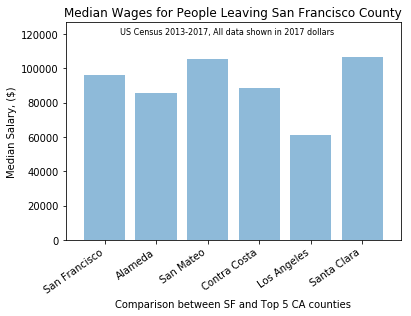

In [24]:
plt.bar(x_axis, median_wage, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
#print(tick_locations)

plt.xticks(tick_locations, x_data, rotation="35", ha='right')   #ha indicates the alignment of the xlabel with the tick mark
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(median_wage) + 20000)
plt.title("Median Wages for People Leaving San Francisco County")
plt.xlabel("Comparison between SF and Top 5 CA counties")
plt.ylabel("Median Salary, ($)")

# Add labels to give more context 

style = dict(size=8, color ='black')
plt.text(0.3,120000, "US Census 2013-2017, All data shown in 2017 dollars", **style)
#plt.text(1,-70000, "All data shown in 2017 dollars", **style)



Text(0.4,120000,'US Census 2013-2017, All data shown in 2017 dollars')

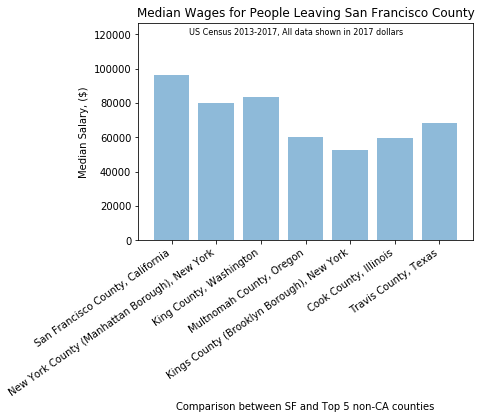

In [25]:
plt.bar(x2_axis, median_wage_nonCA, alpha=0.5, align="center")

tick_locations = [value for value in x2_axis]
#print(tick_locations)

plt.xticks(tick_locations, x2_data, rotation="35", ha='right')   #ha indicates the alignment of the xlabel with the tick mark
plt.xlim(-0.75, len(x2_axis)-0.25)
plt.ylim(0, max(median_wage) + 20000)
plt.title("Median Wages for People Leaving San Francisco County")
plt.xlabel("Comparison between SF and Top 5 non-CA counties")
plt.ylabel("Median Salary, ($)")

# Add labels to give more context 

style = dict(size=8, color ='black')
plt.text(0.4,120000, "US Census 2013-2017, All data shown in 2017 dollars", **style)
#plt.text(1,-70000, "All data shown in 2017 dollars", **style)


Stefan
Number of businesses information
Employment
#SF is not in the front of his graph
#No clear explanation of what the graph's represent


References
Conclusion

Keep in Mind:


The questions you and your group found interesting, and what motivated you to answer them
Where and how you found the data you used to answer these questions
The data exploration and cleanup process (accompanied by your Jupyter Notebook)
The analysis process (accompanied by your Jupyter Notebook)
Your conclusions. This should include a numerical summary as well as visualizations of that summary
Discuss the implications of your findings. This is where you get to have an open-ended discussion about what your findings "mean".
